#3 - Analyzing the Data
===================


Using Matplotlib and Seaborn, I tested various graph options to explore and visualize my data. What I would want to find is a correlation between the concentration of particles and the volume of precipitation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime as dt

`Data and variables:`
-------------------------------------

In order to be able to examine the data more efficiently, I decided to separate the dates into months and years, and add several new columns of categorical values based off the original columns:

<h3>Date based columns:</h3>

**month**, **year** - Extracted from the converted date strings in the date column.


**season** - Based off the month value:

1-Winter *(12,1,2)*

2-Spring *(3,4,5)*

3-Summer *(6,7,8)*

4-Autumn *(9,10,11)*


<h3>Station based columns:</h3>

**region** - Based off the location's geographic region:

1-Galilee *(Afula, Karmiel)* 

2-Haifa & Hadera *(Haifa, Hadera)* 

3-Gush Dan *(Tel Aviv, Rishon LeZion)*

4-Judea & Samaria *(Jerusalem, Ariel)*

5-Shfela *(Ashdod, Kfar Menachem, Kiryat Gat)*

6-Negev *(Beer Sheva, Arad)*


**terrain** - Based off the location's terrain:

1-Mountains *(Haifa, Jerusalem)*

2-Valley *(Afula, Karmiel)*

3-Plains *(Hadera, Tel Aviv, Rishon LeZion, Ashdod, Kiryat Gat)*

4-Hills *(Ariel, Kfar Menachem)*

5-Desert *(Beer Sheva, Arad)*


<h3>Pollution based columns:</h3>

**air_quality** - Based off the NOx value:

1-Good *(NOx is between 0 and 50)*

2-Moderate *(NOx is between 50 and 100)*

3-Low *(NOx is between 100 and 150)*

4-Very low *(NOx is above 150)*


<h3>Precipitation based columns:</h3>

**has_rained** - Based off the precipitation value:

1-Has rained *(precipitation is greater than 0)*

0-Has not rained *(precipitation is 0)*


**rainfall_volume** - Based off the precipitation value:

1-0mm *(precipitation is 0)*

2-0<=5mm *(precipitation is between 0mm and 5mm)*

3-5<=15mm *(precipitation is between 5mm and 15mm)*

4-15mm< *(precipitation is greater than 15mm)*


In [2]:
def load_data(filename):
    return pd.read_csv(filename)  #load file

In [3]:
def add_new_columns(df):
    #Remove the generated index column and convert the date column to datetime
    df.drop(columns=df.columns[0], axis=1, inplace=True) 
    df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
        
    #Create new columns based on the date
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    seasons = [(((df['month'] % 12 + 3) // 3) == 1),
               (((df['month'] % 12 + 3) // 3) == 2),
               (((df['month'] % 12 + 3) // 3) == 3),
               (((df['month'] % 12 + 3) // 3) == 4)]
    season_values = [1,2,3,4]
    df['season'] = np.select(seasons, season_values)
    
    #Create new columns based on the location
    regions = [(df['station'] == "Afula") | (df['station'] == "Karmiel"),
               (df['station'] == "Haifa") | (df['station'] == "Hadera"),
               (df['station'] == "Tel Aviv") | (df['station'] == "Rishon LeZion"),
               (df['station'] == "Ariel") | (df['station'] == "Jerusalem"),
               (df['station'] == "Ashdod") | (df['station'] == "Kiryat Gat") | (df['station'] == "Kfar Menachem"),
               (df['station'] == "Beer Sheva") | (df['station'] == "Arad")]
    region_values = [1,2,3,4,5,6]    #Galilee, Haifa, Center, Judea & Samaria, Shfela, Negev
    df['region'] = np.select(regions, region_values)
    
    terrain = [(df['station'] == "Haifa") | (df['station'] == "Jerusalem"),
               (df['station'] == "Ariel") | (df['station'] == "Kfar Menachem"),
               (df['station'] == "Afula") | (df['station'] == "Karmiel"),               
               (df['station'] == "Hadera") | (df['station'] == "Tel Aviv") | (df['station'] == "Rishon LeZion") | (df['station'] == "Ashdod") | (df['station'] == "Kiryat Gat"),
               (df['station'] == "Beer Sheva") | (df['station'] == "Arad")]
    terrain_values = [1,2,3,4,5] #Mountains, Hills, Valley, Plains, Desert
    df['terrain'] = np.select(terrain, terrain_values)    
    
    #Create new column based on pollution        
    air_quality = [(df['NOX'] >= 0) & (df['NOX'] <= 50),
                   (df['NOX'] > 50) & (df['NOX'] <= 100),
                   (df['NOX'] > 100) & (df['NOX'] <= 150),
                   (df['NOX'] > 150)]
    air_quality_values = [1,2,3,4] #Good, Moderate, Low, Very low
    df['air_quality'] = np.select(air_quality, air_quality_values)
    
    #Create new column based on precipitation
    df['has_rained'] = np.where(df['precipitation']>0 , 1, 0)    
    rainfall_volumes = [(df['precipitation'] == 0),
                  (df['precipitation'] > 0) & (df['precipitation'] <= 5),
                  (df['precipitation'] > 5) & (df['precipitation'] <= 15),
                  (df['precipitation'] > 15)]    
    df['rainfall_volume'] = np.select(rainfall_volumes, season_values)
            
    return df

In [4]:
df = load_data('data_final.csv')
df = add_new_columns(df)

In [5]:
df.head()

,date,station,NO,NO2,NOX,precipitation,year,month,season,region,terrain,air_quality,has_rained,rainfall_volume
0,2016-01-01,Ariel,1.5,3.8,6.1,13.6,2016,1,1,4,2,1,1,3
1,2016-01-02,Ariel,1.1,4.9,6.7,7.4,2016,1,1,4,2,1,1,3
2,2016-01-03,Ariel,1.4,10.8,13.0,9.0,2016,1,1,4,2,1,1,3
3,2016-01-04,Ariel,1.8,9.7,12.5,0.0,2016,1,1,4,2,1,0,1
4,2016-01-05,Ariel,2.1,11.8,15.1,0.0,2016,1,1,4,2,1,0,1


In [6]:
df.describe()

,NO,NO2,NOX,precipitation,year,month,season,region,terrain,air_quality,has_rained,rainfall_volume
count,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000
mean,7.566239,18.913580,29.442905,1.181230,2018.000000,6.521073,2.502463,3.615385,3.230769,1.223822,0.145594,1.230896
std,15.655112,15.776729,35.735651,5.390794,1.415017,3.449285,1.114868,1.688843,1.309980,0.591881,0.352706,0.631182
min,-2.600000,-0.700000,0.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.700000,8.000000,9.300000,0.000000,2017.000000,4.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000
50%,2.000000,13.650000,16.600000,0.000000,2018.000000,7.000000,3.000000,4.000000,4.000000,1.000000,0.000000,1.000000
75%,7.100000,24.400000,34.100000,0.000000,2019.000000,10.000000,3.000000,5.000000,4.000000,1.000000,0.000000,1.000000
max,363.700000,127.100000,475.000000,110.000000,2020.000000,12.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23751 entries, 0 to 23750
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             23751 non-null  datetime64[ns]
 1   station          23751 non-null  object        
 2   NO               23751 non-null  float64       
 3   NO2              23751 non-null  float64       
 4   NOX              23751 non-null  float64       
 5   precipitation    23751 non-null  float64       
 6   year             23751 non-null  int64         
 7   month            23751 non-null  int64         
 8   season           23751 non-null  int32         
 9   region           23751 non-null  int32         
 10  terrain          23751 non-null  int32         
 11  air_quality      23751 non-null  int32         
 12  has_rained       23751 non-null  int32         
 13  rainfall_volume  23751 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int3

`Visualizing pollution data:`
-------------------------------------

<h3>Stacked bar charts - Monthly pollution concentration mean by year</h3>

The following functions display the pollution average of NO and NO2 across my research timeline, shown in months:

* **visualize_annual_pollution**, which shows the data for all the stations in my research.

* **visualize_annual_pollution_by_station**, which also receives the station name, and will instead display annual data for the station only.

In [8]:
def visualize_annual_pollution(df):
    annual_pollution_df = df[['year', 'month', 'NO', 'NO2']].copy()   
     
    #Group pollution data by year and month (monthly mean value)
    annual_pollution_df = annual_pollution_df.groupby(['year', 'month']).mean()
    print(annual_pollution_df)
        
    n_subplots = len(annual_pollution_df.index.levels[0])
    fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(16, 8))  # width, height
    fig.suptitle("Annual pollution data, NO + NO2, 2016-2020 (μg/m^3, daily average by month)", fontsize=16)
    
    graph = dict(zip(annual_pollution_df.index.levels[0], axes))
    plots = list(map(lambda x: annual_pollution_df.xs(x).plot(kind='bar', ax=graph[x], stacked=True, legend=False, color=plt.cm.Pastel2.colors).set_xlabel(x, weight='bold'), graph))
    fig.subplots_adjust(wspace=0)      
    axes[0].set_ylabel("NO + NO2 (avg)")
    
    plt.legend()
    plt.show()    

                   NO        NO2
year month                      
2016 1      18.589066  28.356855
     2      21.305288  32.694164
     3       9.558530  22.173961
     4       7.812077  22.262160
     5       5.258561  16.611492
     6       5.911900  17.907088
     7       3.412253  12.214744
     8       2.848305  11.432771
     9       5.362041  14.513490
     10      8.362699  19.708842
     11     12.369099  25.912567
     12     12.847500  25.851746
2017 1      15.702590  27.521408
     2      14.878263  29.822654
     3       8.516873  22.744417
     4       5.636550  20.078766
     5       4.794976  17.509852
     6       3.583381  13.549423
     7       3.839388  13.730502
     8       3.609233  13.001169
     9       4.345847  14.862919
     10      8.694968  21.441834
     11     13.195545  26.680104
     12     21.960763  30.271293
2018 1      12.717816  22.378998
     2      18.348380  28.173900
     3      10.449132  23.632010
     4       5.504471  19.535176
     5    

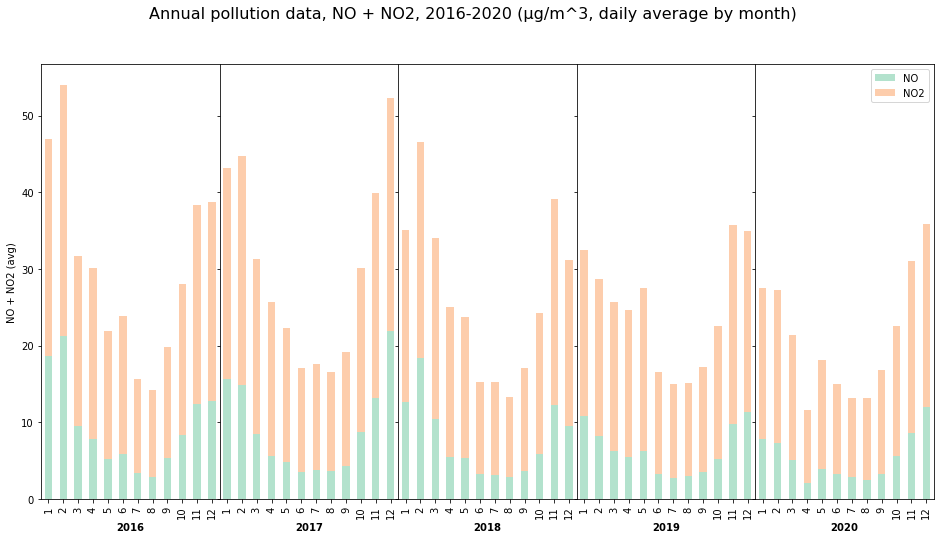

In [9]:
visualize_annual_pollution(df)

In [10]:
def visualize_annual_pollution_by_station(df, station_name):
    df2 = df[['year', 'month', 'station', 'NO', 'NO2']].copy()   
    df2 = df2.loc[df2['station'] == station_name]
        
    #Group pollution data by year and month (monthly mean value)
    df2 = df2.groupby(['year', 'month', 'station']).mean()    
    #print(df2)
    
    #Create a bar plot
    n_subplots = len(df2.index.levels[0])
    fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(16, 8))  # width, height
    fig.suptitle("Annual pollution data in {0}, NO + NO2, 2016-2020 (μg/m^3, daily average by month)".format(station_name), fontsize=16)
        
    graph = dict(zip(df2.index.levels[0], axes))
    plots = list(map(lambda x: df2.xs(x).plot(kind='bar', ax=graph[x], stacked=True, legend=False, color=plt.cm.Pastel2.colors).set_xlabel(x, weight='bold'), graph))
    fig.subplots_adjust(wspace=0)      
    axes[0].set_ylabel("NO + NO2 (avg)")
    
    plt.yticks([0,20,40,60,80,100,120,140,160])
    plt.legend()
    plt.show()  

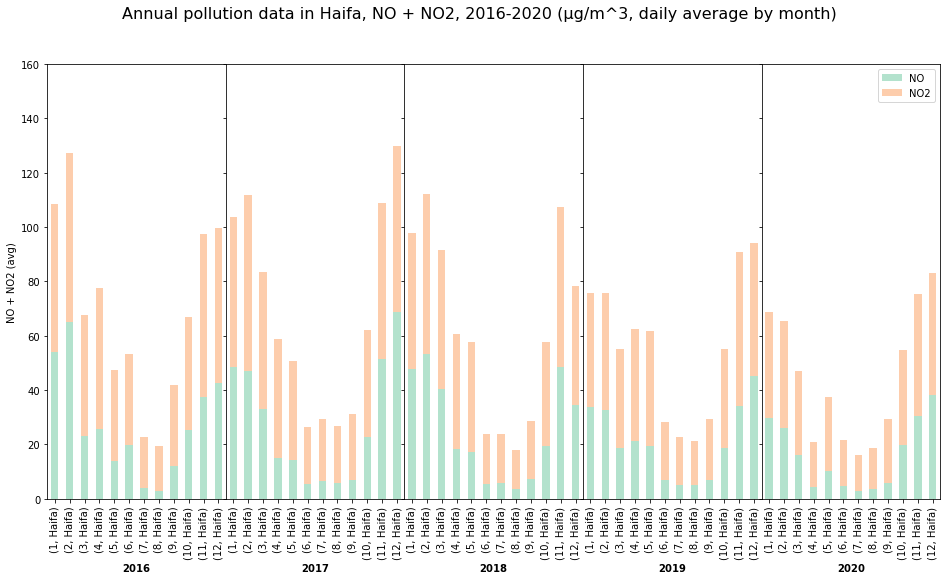

In [11]:
visualize_annual_pollution_by_station(df, 'Haifa')

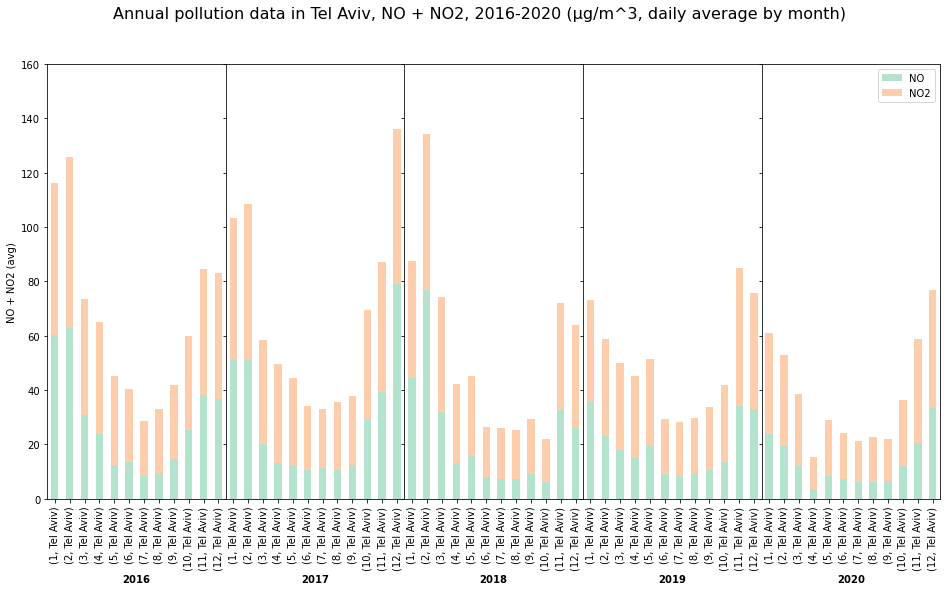

In [12]:
visualize_annual_pollution_by_station(df, 'Tel Aviv')

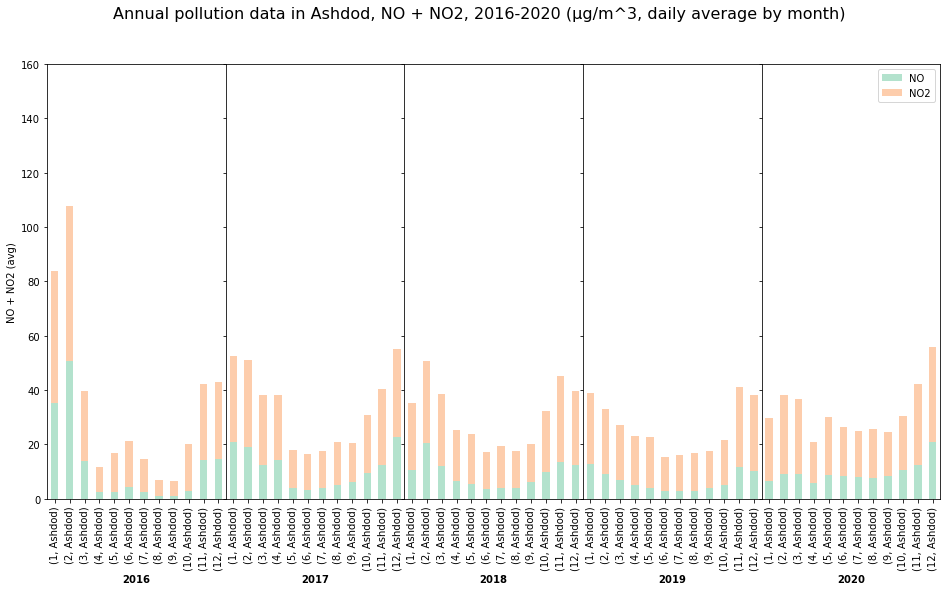

In [13]:
visualize_annual_pollution_by_station(df, 'Ashdod')

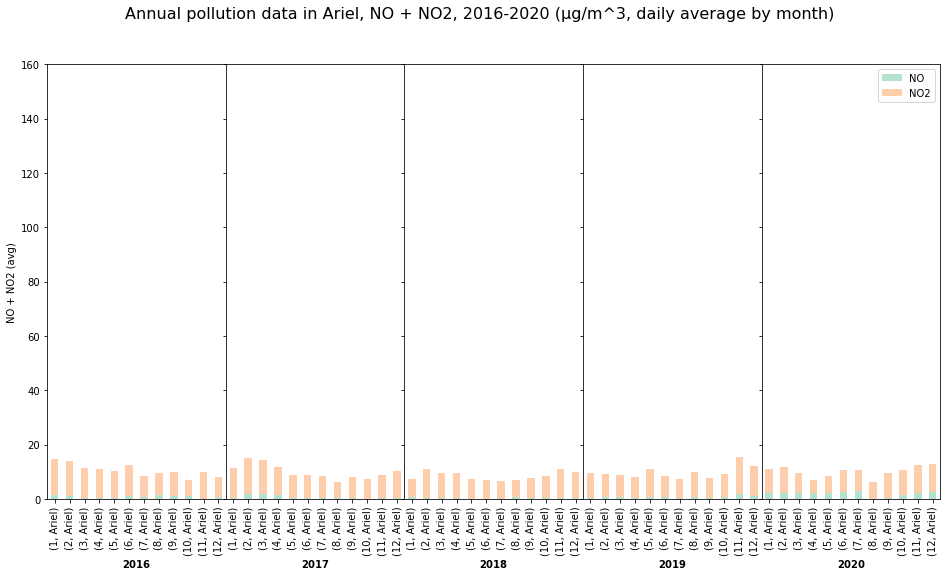

In [14]:
visualize_annual_pollution_by_station(df, 'Ariel')

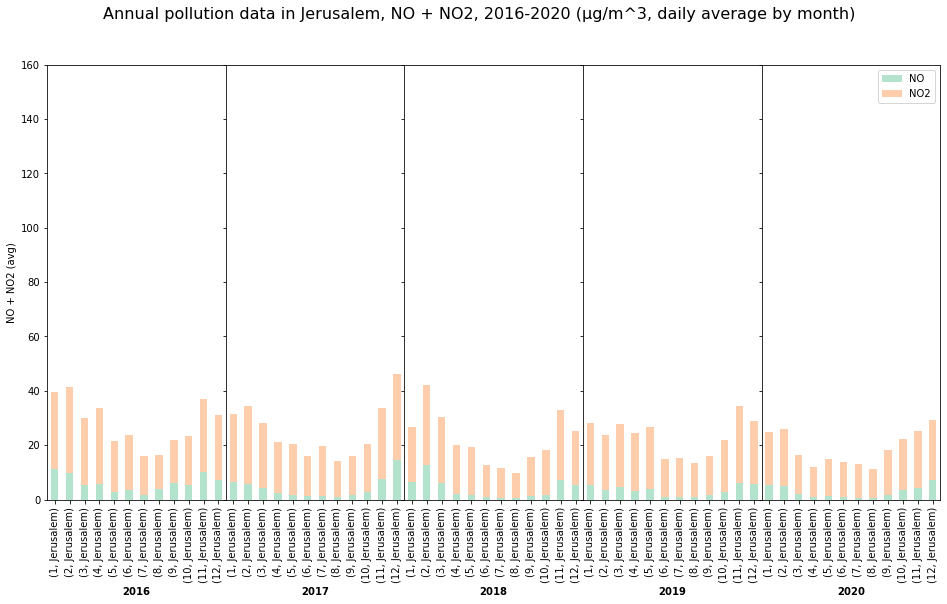

In [15]:
visualize_annual_pollution_by_station(df, 'Jerusalem')

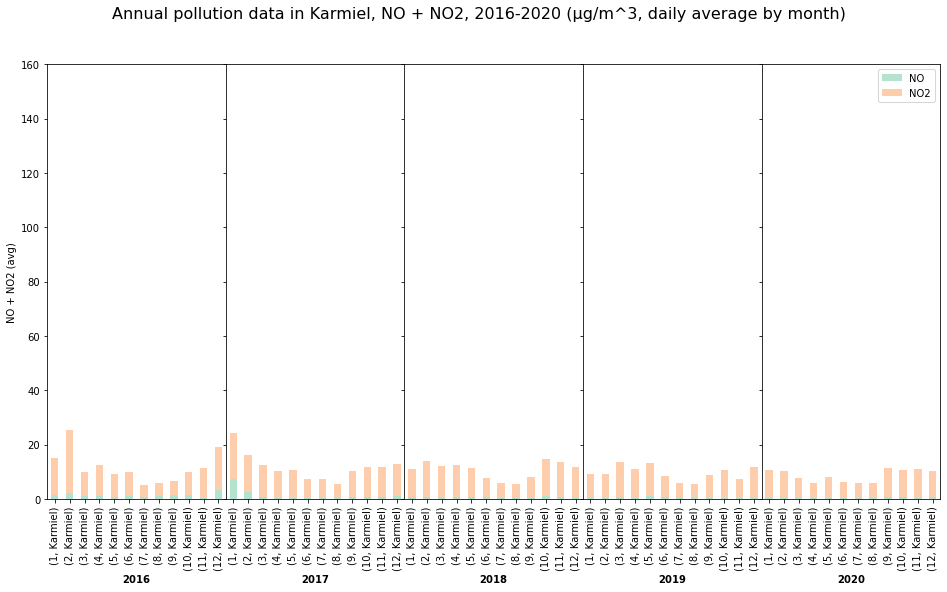

In [16]:
visualize_annual_pollution_by_station(df, 'Karmiel')

<h3>Line chart - Monthly pollution mean by year</h3>
    
The following figure compares monthly mean NOx concentrations by year:

In [17]:
def visualize_mean_pollution(df):
    pmean_df = df[['year', 'month', 'NOX']].copy() 
    df_2016 = pmean_df.loc[df['year'] == 2016]
    df_2016 = df_2016.groupby(['month']).mean()
    df_2017 = pmean_df.loc[df['year'] == 2017]
    df_2017 = df_2017.groupby(['month']).mean()
    df_2018 = pmean_df.loc[df['year'] == 2018]
    df_2018 = df_2018.groupby(['month']).mean()
    df_2019 = pmean_df.loc[df['year'] == 2019]
    df_2019 = df_2019.groupby(['month']).mean()
    df_2020 = pmean_df.loc[df['year'] == 2020]
    df_2020 = df_2020.groupby(['month']).mean()
     
    #Create a line plot
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle("Monthly pollution mean, 2016-2020", fontsize=16)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    plt.xlabel("Month")
    plt.ylabel("NOx")
    
    plt.plot(df_2016['NOX'], label = "2016")
    plt.plot(df_2017['NOX'], label = "2017")
    plt.plot(df_2018['NOX'], label = "2018")
    plt.plot(df_2019['NOX'], label = "2019")
    plt.plot(df_2020['NOX'], label = "2020")

    plt.legend()
    plt.show() 

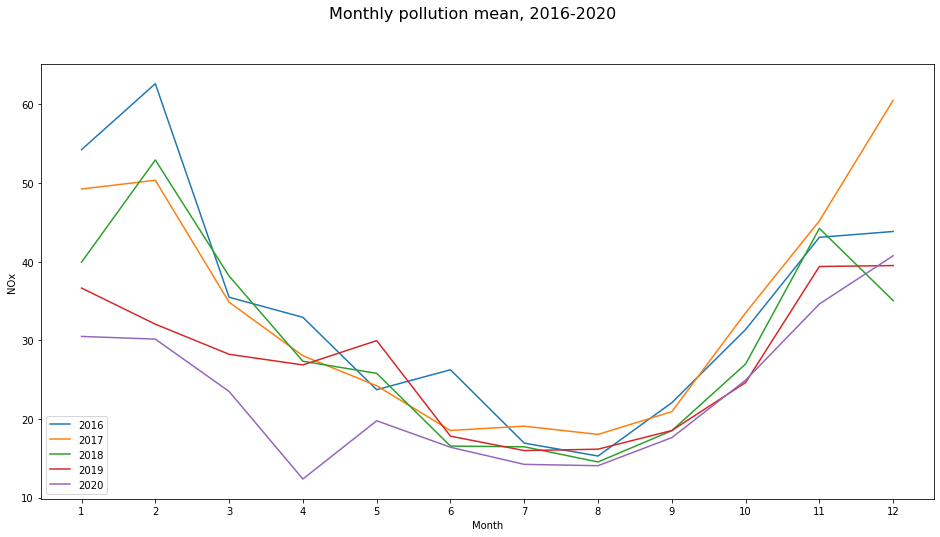

In [18]:
visualize_mean_pollution(df)

<h3>Pie charts - Air quality</h3>
    
The following figures show the percentage of particle concentration levels and the division into days with average quality and lower quality by season:

In [19]:
def visualize_air_quality(df):
    quality_df = df[['NOX', 'air_quality', 'season']].copy() 
    season_df = quality_df.loc[df['air_quality'] > 1]
    values = [1,2,3,4]
            
    fig, axes = plt.subplots(1, 2, figsize=(16,16))
    labels1 = ["Good", "Moderate", "Low", "Very low"]
    axes[0].pie(quality_df['air_quality'].value_counts().reindex(values), explode=[0,0.1,0.1,0.1], labels=labels1, autopct='%1.2f%%', colors=['#52b05f', '#dac253', '#d98831', '#cb4218'], textprops={'fontsize': 16}, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    axes[0].set_title("Air quality ranking by daily mean", fontsize=16)
    axes[0].legend(labels1)
    labels2 = ["Winter", "Spring", "Summer", "Autumn"]
    axes[1].pie(season_df['season'].value_counts().reindex(values), explode=[0,0,0,0], labels=labels2, autopct='%1.2f%%', colors=['#317973', '#905f94', '#c2b08a', '#c0d649'], textprops={'fontsize': 16}, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    axes[1].set_title("Polluted days by season", fontsize=16)
    axes[1].legend(labels2)
    
    plt.show()

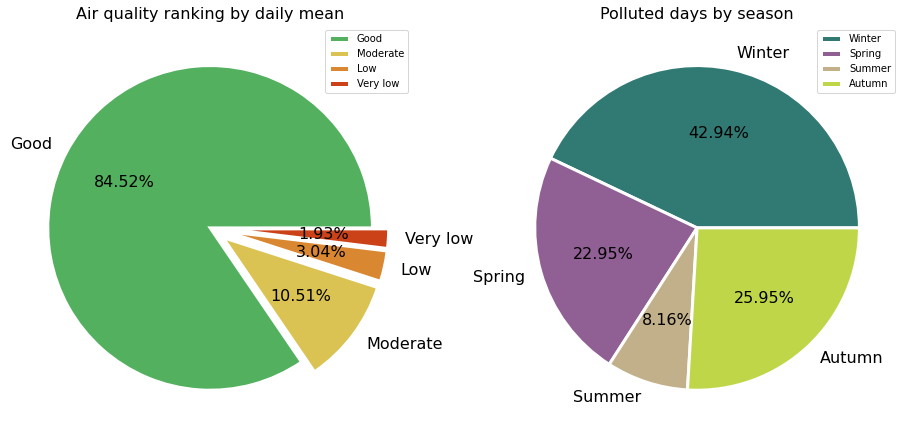

In [20]:
visualize_air_quality(df)

<h3>Bar charts - Monthly pollution mean by region and terrain</h3>
    
The following figures compare monthly mean NOx concentrations by region and by terrain:

In [21]:
def visualize_poll_location(df):
    poll_df = df[['year', 'month', 'station', 'NO', 'NO2', 'NOX', 'season', 'region', 'terrain']].copy() 
    reg_df = poll_df.groupby(['month','year', 'station'], as_index=False).agg({'year': 'first', 'month': 'first', 'NO': 'mean', 'NO2': 'mean', 'NOX': 'mean', 'season': 'first', 'region': 'first', 'terrain': 'first'}) 
    
    #Plot the bar charts and show them
    fig, axes = plt.subplots(2, figsize=(16, 16)) 
    fig.tight_layout(pad=3.5)
        
    ax1 = sns.barplot(ax=axes[0], x="month", y="NOX", hue="region", data=reg_df, palette='copper', ci = None)
    ax1.set_title("Monthly pollution mean by region", fontsize=16)    
    reg_labels = ['Galilee', 'Haifa & Hadera', 'Gush Dan', 'Judea & Samaria', 'Shfela', 'Negev']
    ax1.legend(reg_labels, loc='upper center')
    
    ax2 = sns.barplot(ax=axes[1], x="month", y="NOX", hue="terrain", data=reg_df, palette='autumn', ci = None)
    ax2.set_title("Monthly pollution mean by terrain", fontsize=16)
    terr_labels = ['Mountains', 'Hills', 'Valley', 'Plains', 'Desert']
    ax2.legend(terr_labels, loc='upper center')
    
    plt.show()

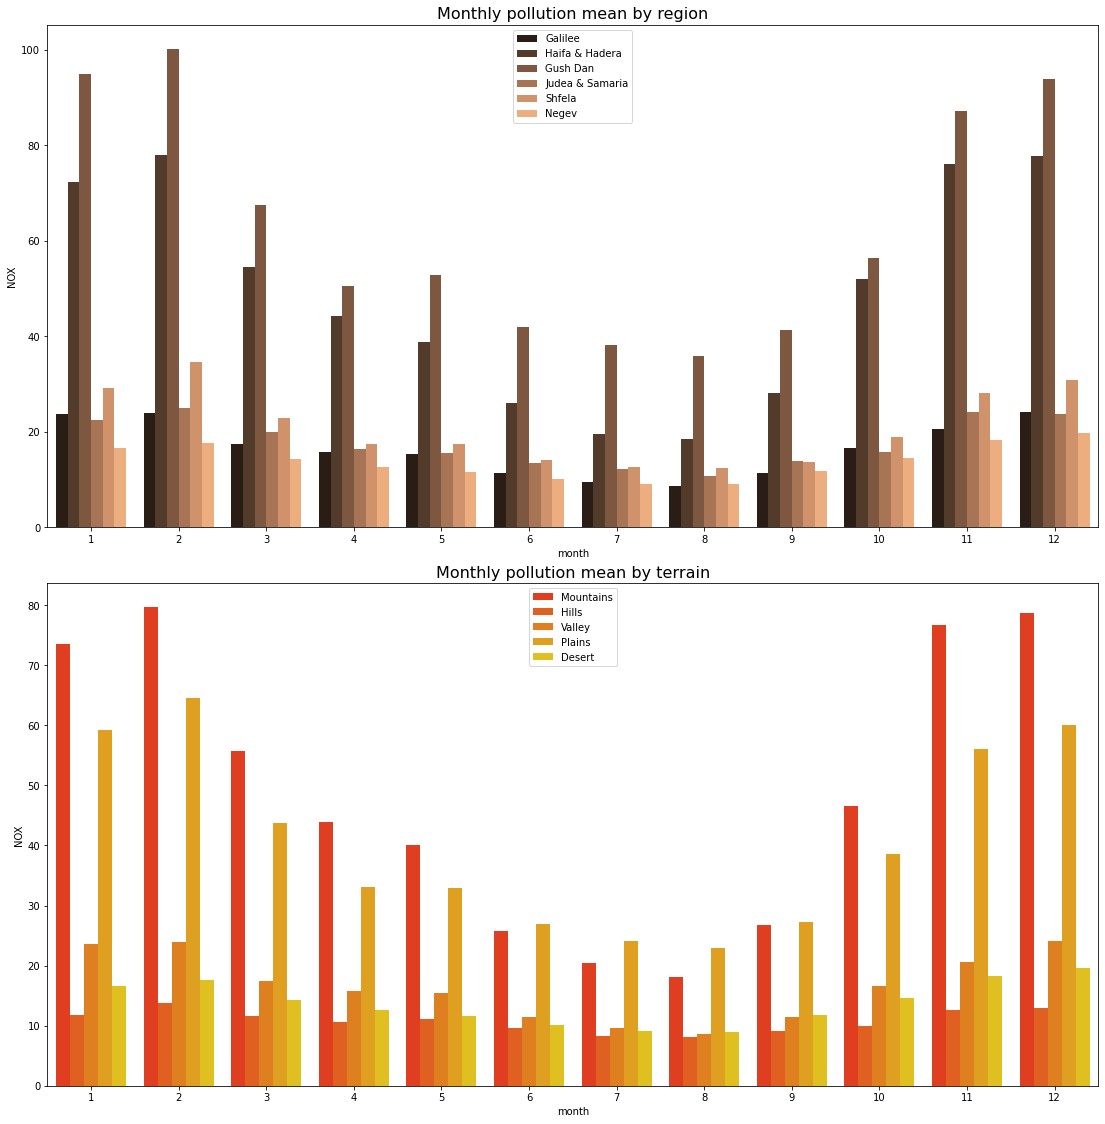

In [22]:
visualize_poll_location(df)

`Visualizing precipitation data:`
-------------------------------------

<h3>Bar charts - Monthly precipitation total by year</h3>

The following functions display the annual precipitation data, shown in months:

* **visualize_annual_precipitation**, which shows the data for all the stations in my research.

* **visualize_annual_precipitation_by_station**, which also receives the station name, and will instead display annual data for the station only.

In [23]:
def visualize_annual_precipitation(df):
    prec_total_df = df[['year', 'month', 'precipitation']].copy()   
     
    #Group precipitation data by year and month (monthly total)
    prec_total_df = prec_total_df.groupby(['year', 'month']).sum()
    print(prec_total_df)
        
    n_subplots = len(prec_total_df.index.levels[0])
    fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(16, 8))  # width, height
    fig.suptitle("Annual precipitation data, 2016-2020 (mm, monthly total)", fontsize=16)

    graph = dict(zip(prec_total_df.index.levels[0], axes))
    plots = list(map(lambda x: prec_total_df.xs(x).plot(kind='bar', ax=graph[x], legend=False).set_xlabel(x, weight='bold'), graph))
    fig.subplots_adjust(wspace=0)      
    axes[0].set_ylabel("Precipitation (mm)")

    plt.legend()
    plt.show()    

            precipitation
year month               
2016 1             1285.2
     2              868.1
     3              282.9
     4              205.8
     5               42.6
     6                0.0
     7                0.0
     8                0.0
     9                1.9
     10              17.7
     11              59.8
     12            2230.4
2017 1              760.6
     2              601.2
     3              152.2
     4               76.8
     5                9.6
     6                0.0
     7                0.0
     8                0.0
     9                0.0
     10             183.2
     11             320.3
     12             564.2
2018 1             2196.5
     2              938.9
     3               80.3
     4              496.6
     5              118.4
     6               38.9
     7                0.0
     8                0.3
     9                4.8
     10             253.5
     11             726.2
     12            2179.7
2019 1      

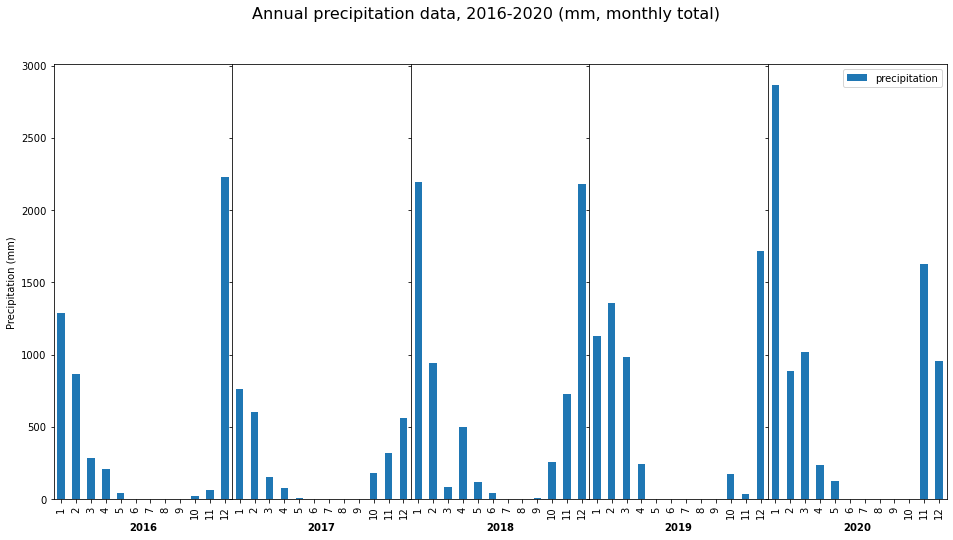

In [24]:
visualize_annual_precipitation(df)

In [25]:
def visualize_annual_precipitation_by_station(df, station_name):
    df2 = df[['year', 'month', 'station', 'precipitation']].copy()   
    df2 = df2.loc[df2['station'] == station_name]
        
    #Group precipitation data by year and month (monthly total)
    df2 = df2.groupby(['year', 'month', 'station']).sum()
    #print(df2)
    
    #Create a bar plot
    n_subplots = len(df2.index.levels[0])
    fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(16, 8))  # width, height
    fig.suptitle("Annual precipitation in {0}, 2016-2020 (mm, monthly total)".format(station_name), fontsize=16)
    
    graph = dict(zip(df2.index.levels[0], axes))
    plots = list(map(lambda x: df2.xs(x).plot(kind='bar', ax=graph[x], stacked=True, legend=False).set_xlabel(x, weight='bold'), graph))
    fig.subplots_adjust(wspace=0)      
    axes[0].set_ylabel("Precipitation (mm)")
    
    plt.yticks([0,50,100,150,200,250,300])
    plt.legend()
    plt.show()

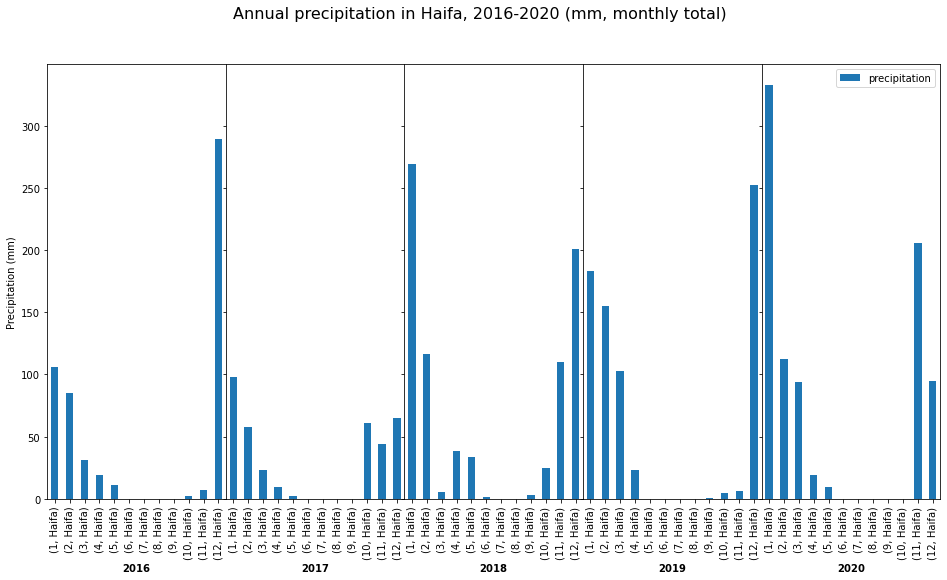

In [26]:
visualize_annual_precipitation_by_station(df, 'Haifa')

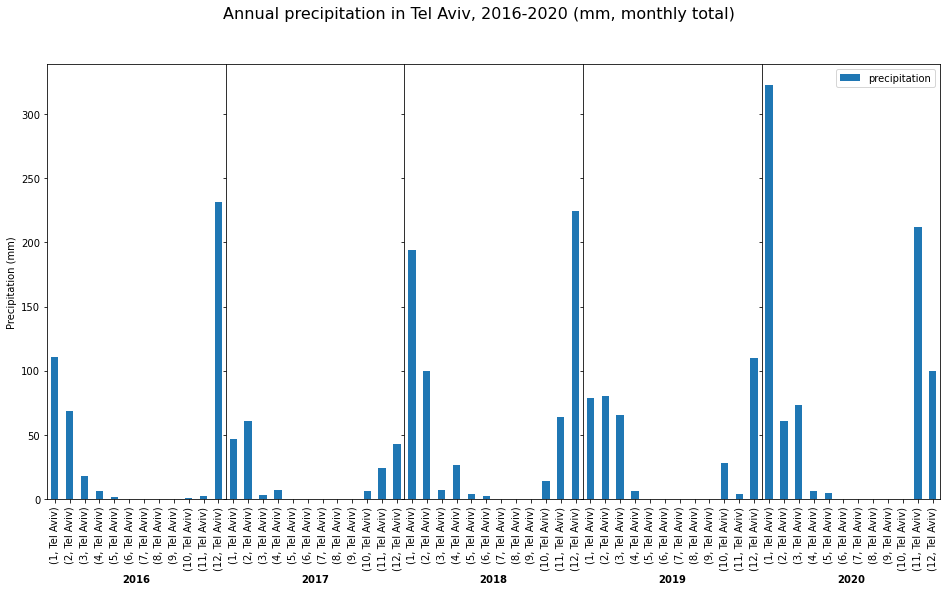

In [27]:
visualize_annual_precipitation_by_station(df, 'Tel Aviv')

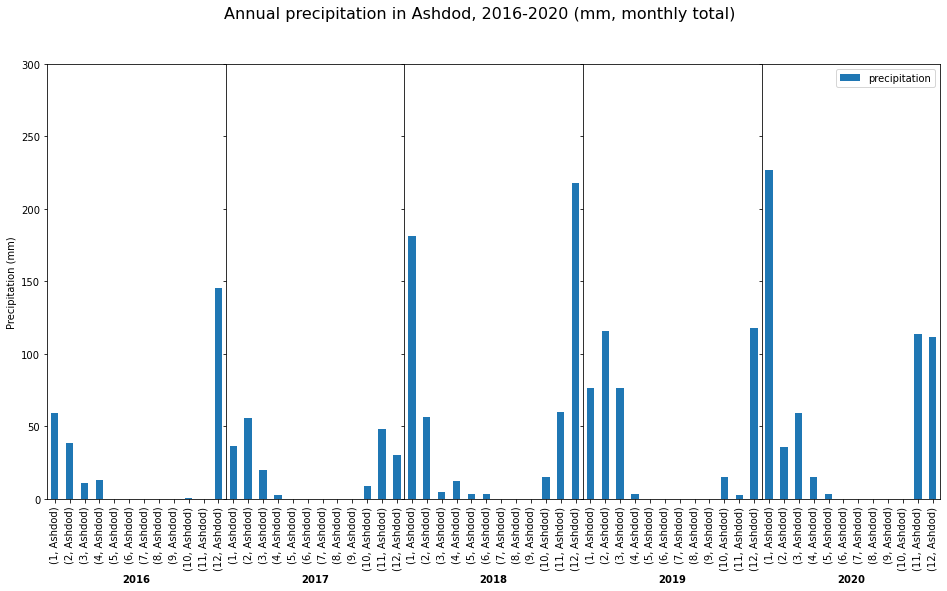

In [28]:
visualize_annual_precipitation_by_station(df, 'Ashdod')

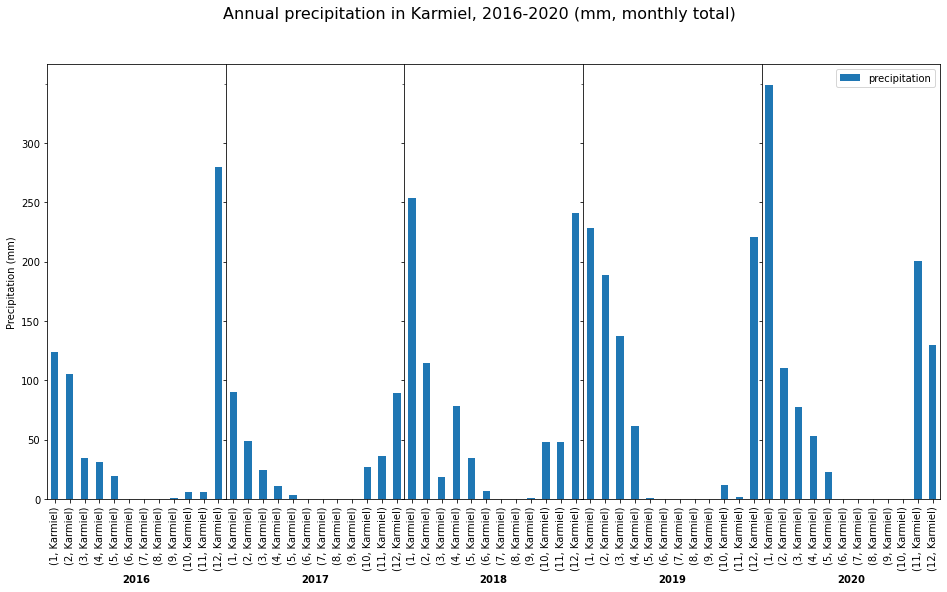

In [29]:
visualize_annual_precipitation_by_station(df, 'Karmiel')

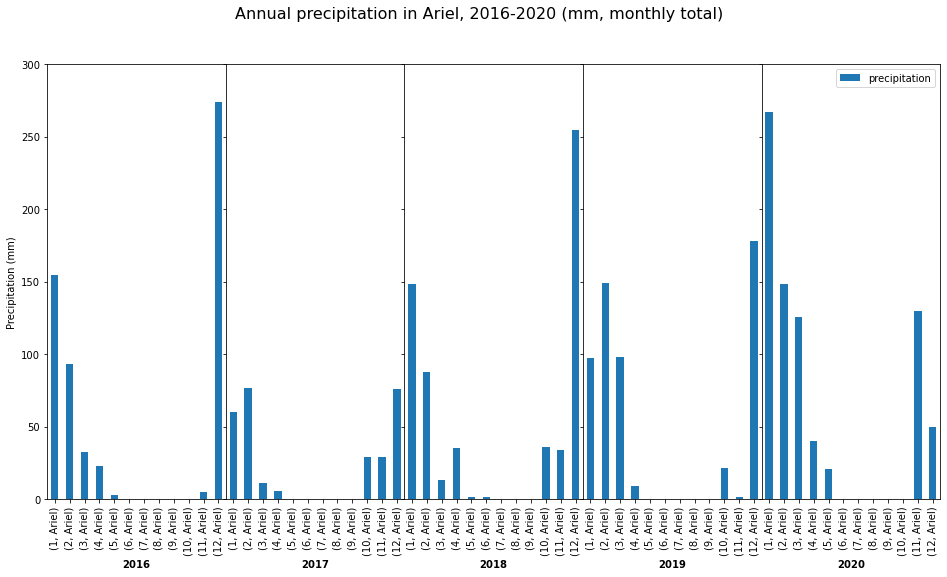

In [30]:
visualize_annual_precipitation_by_station(df, 'Ariel')

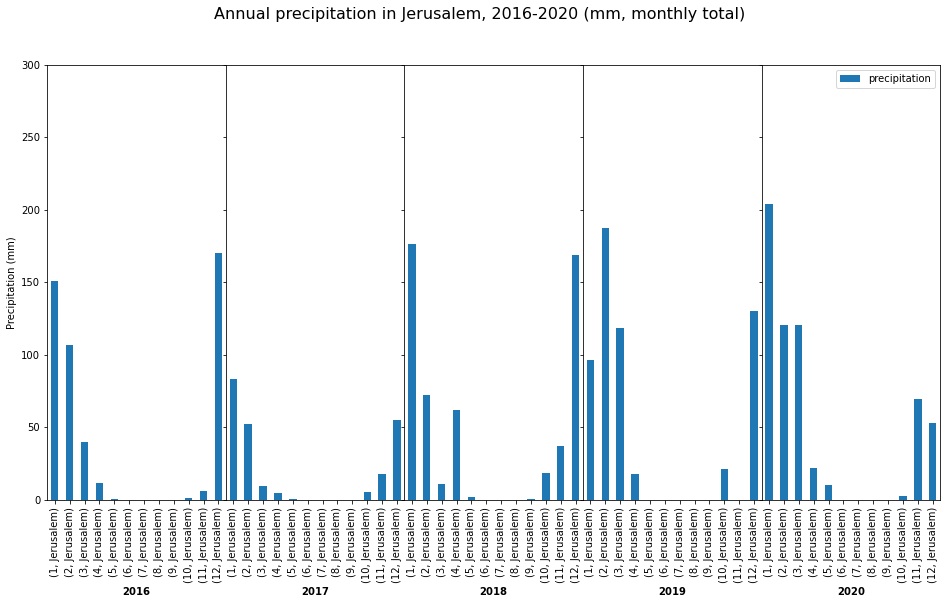

In [31]:
visualize_annual_precipitation_by_station(df, 'Jerusalem')

<h3>Line chart - Monthly precipitation mean by year</h3>

The following function compares the monthly precipitation mean by year:

In [32]:
def visualize_mean_precipitation(df):
    pmean_df = df[['year', 'month', 'precipitation']].copy() 
    df_2016 = pmean_df.loc[df['year'] == 2016]
    df_2016 = df_2016.groupby(['month']).mean()
    df_2017 = pmean_df.loc[df['year'] == 2017]
    df_2017 = df_2017.groupby(['month']).mean()
    df_2018 = pmean_df.loc[df['year'] == 2018]
    df_2018 = df_2018.groupby(['month']).mean()
    df_2019 = pmean_df.loc[df['year'] == 2019]
    df_2019 = df_2019.groupby(['month']).mean()
    df_2020 = pmean_df.loc[df['year'] == 2020]
    df_2020 = df_2020.groupby(['month']).mean()
     
    #Create a line plot
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle("Monthly precipitation mean, 2016-2020", fontsize=16)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    plt.xlabel("Month")
    plt.ylabel("Precipitation (mm)")
    
    plt.plot(df_2016['precipitation'], label = "2016")
    plt.plot(df_2017['precipitation'], label = "2017")
    plt.plot(df_2018['precipitation'], label = "2018")
    plt.plot(df_2019['precipitation'], label = "2019")
    plt.plot(df_2020['precipitation'], label = "2020")

    plt.legend()
    plt.show() 

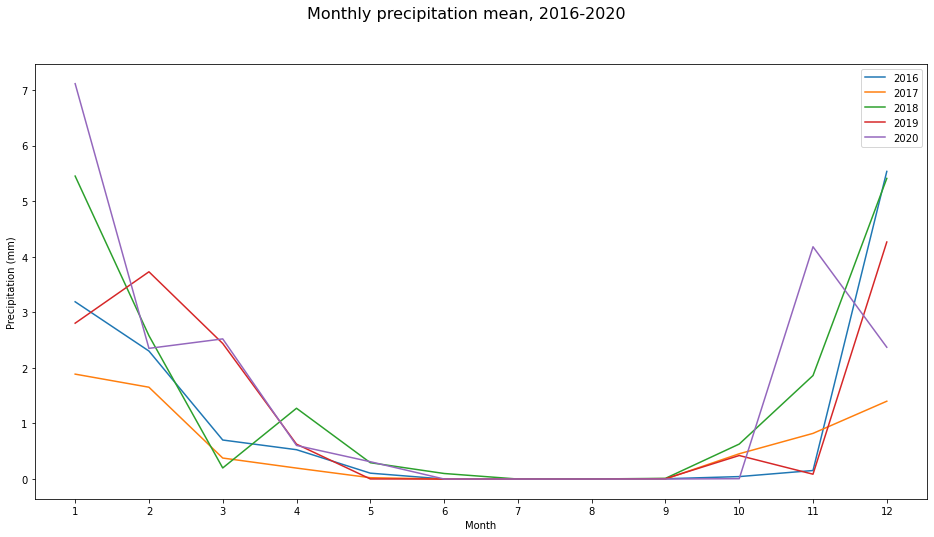

In [33]:
visualize_mean_precipitation(df)

<h3>Pie charts - Rain days</h3>
    
The next figures are pie charts, showing various measures of rain days:

In [34]:
def visualize_prec_days(df):
    prec_df = df[['precipitation', 'has_rained', 'rainfall_volume', 'season']].copy() 
    season_df = df.loc[df['has_rained'] == 1]
    values = [1,2,3,4]
        
    #Plot the pie charts and show them
    fig, axes = plt.subplots(1, 3, figsize=(16,16))
    labels1 = ["No rain","Has rained"]
    axes[0].pie(prec_df['has_rained'].value_counts(), explode=[0, 0.1], labels=["No rain","Has rained"], autopct='%1.2f%%', colors=['#cd873b', '#3F7FBF'], textprops={'fontsize': 16}, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    axes[0].set_title("Percentage of rainy and dry days", fontsize=16)
    axes[0].legend(labels1)
    labels2 = ['0', '0 <= 5', '5 <= 15', '15 <']       
    axes[1].pie(prec_df['rainfall_volume'].value_counts(), explode=[0,0.1,0.1,0.1], labels = labels2, autopct='%1.2f%%', colors=['#c1d6ee', '#3F7FBF', '#4C7FB2', '#667F99'], textprops={'fontsize': 16}, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    axes[1].set_title("Precipitation by daily amount (mm)", fontsize=16)
    axes[1].legend(labels2)
    labels3 = ['Winter', 'Spring', 'Summer', 'Autumn']       
    axes[2].pie(season_df['season'].value_counts().reindex(values), labels = labels3, autopct='%1.2f%%', colors=['#317973', '#905f94', '#c2b08a', '#c0d649'], textprops={'fontsize': 16}, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    axes[2].set_title("Rain days by season", fontsize=16)
    axes[2].legend(labels3)
    
    plt.show()

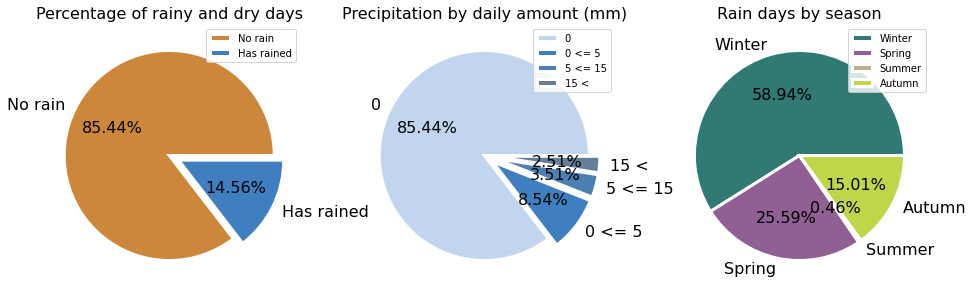

In [35]:
visualize_prec_days(df)

<h3>Bar charts - Monthly precipitation in relation to region and terrain</h3>
    
The following figures compare mean precipitation by region and by terrain:

In [36]:
def visualize_prec_location(df):
    prec_df = df[['year', 'month', 'station', 'precipitation', 'has_rained', 'rainfall_volume', 'season', 'region', 'terrain']].copy() 
    reg_df = prec_df.groupby(['month','year', 'station'], as_index=False).agg({'year': 'first', 'month': 'first', 'precipitation': 'mean', 'season': 'first', 'region': 'first', 'terrain': 'first'}) 
        
    fig, axes = plt.subplots(2, figsize=(16, 16)) 
    fig.tight_layout(pad=3.5)
        
    ax1 = sns.barplot(ax=axes[0], x="month", y="precipitation", hue="region", data=reg_df, palette='mako', ci = None)
    ax1.set_title("Monthly precipitation mean by region", fontsize=16)    
    reg_labels = ['Galilee', 'Haifa & Hadera', 'Gush Dan', 'Judea & Samaria', 'Shfela', 'Negev']
    ax1.legend(reg_labels, loc='upper center')
    
    ax2 = sns.barplot(ax=axes[1], x="month", y="precipitation", hue="terrain", data=reg_df, palette='icefire', ci = None)
    ax2.set_title("Monthly precipitation mean by terrain", fontsize=16)
    terr_labels = ['Mountains', 'Hills', 'Valley', 'Plains', 'Desert']
    ax2.legend(terr_labels, loc='upper center')
    
    plt.show()

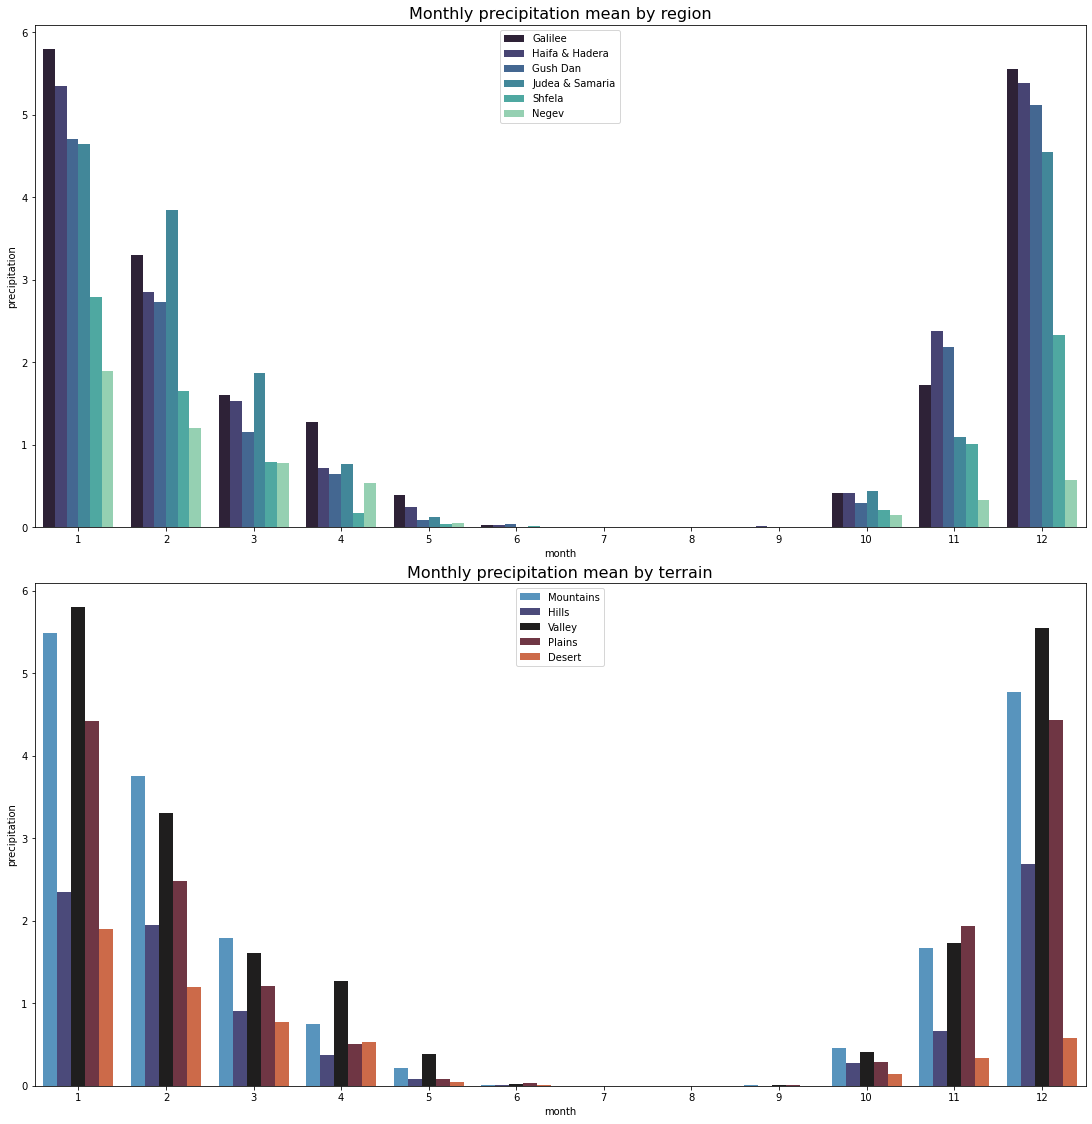

In [37]:
visualize_prec_location(df)

`Looking for correlation:`
-------------------------------------
My next step was to look for the correlation between pollution and precipitation:

The function **visualize_poll_prec_correlation** displays a scatter plot of the correlation between the particle and the precipitation, colored by the rain volume and the season. 

The function **visualize_poll_prec_correlation_timeline** displays a scatter plot of the correlation between the month/year and the particle, with the dot size determined by the rain volume, colored by the season.


In [38]:
def visualize_poll_prec_correlation(df, particle_name, xlim, ylim):      
               
    #Plot the figures
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 8)) 
    fig.tight_layout(pad=3.5)
    
    sc1 = ax1.scatter(x=df['precipitation'], y=df[particle_name], c=df['rainfall_volume'], cmap='viridis')    
    ax1.set_title("{0}/precipitation correlation by rainfall volume".format(particle_name), fontsize=16)    
    ax1.set_xlabel("Precipitation (mm)", fontsize=14)
    ax1.set_ylabel("{0} (μg/m^3)".format(particle_name), fontsize=14)
    ax1.set_xlim(-1,xlim)
    ax1.set_ylim(-1,ylim)
    handles, labels = sc1.legend_elements()
    ax1.legend(handles, labels, title="Rainfall Volume")
    
    sc2 = ax2.scatter(x=df['precipitation'], y=df[particle_name], c=df['season'], cmap='cividis')    
    ax2.set_title("{0}/precipitation correlation by season".format(particle_name), fontsize=16)    
    ax2.set_xlabel("Precipitation (mm)", fontsize=14)
    ax2.set_ylabel("{0} (μg/m^3)".format(particle_name), fontsize=14)
    ax2.set_xlim(-1,xlim)
    ax2.set_ylim(-1,ylim)       
    handles, labels = sc2.legend_elements()
    ax2.legend(handles, labels, title="Seasons")
             
    plt.show()

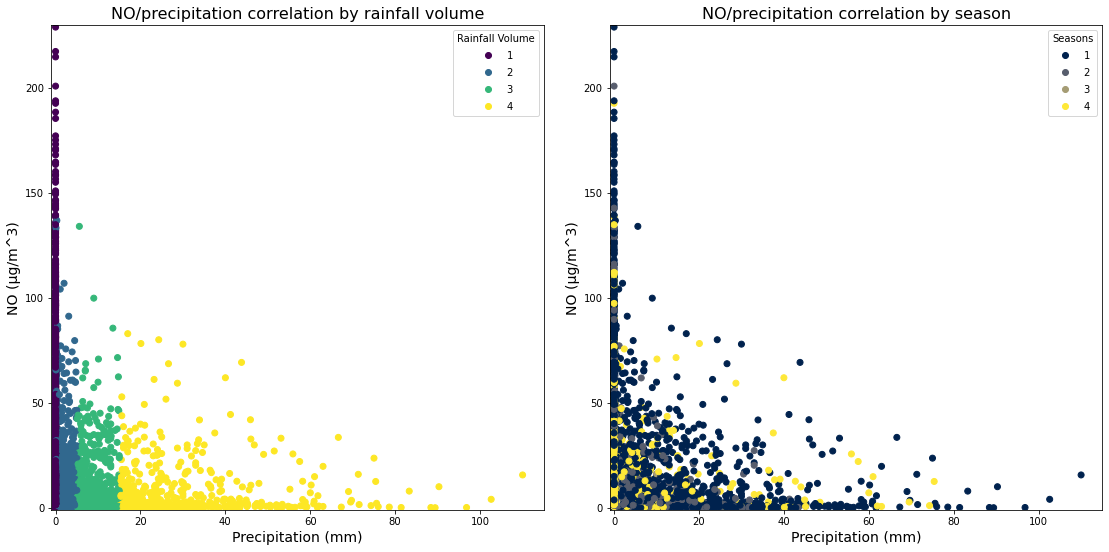

In [39]:
visualize_poll_prec_correlation(df, 'NO', 115, 230)

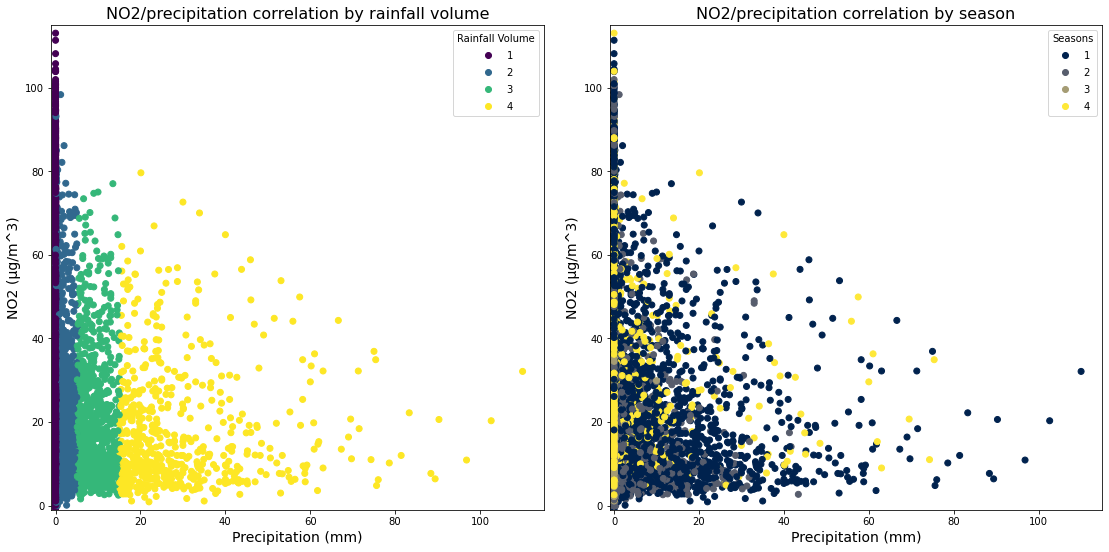

In [40]:
visualize_poll_prec_correlation(df, 'NO2', 115, 115)

In [41]:
def visualize_poll_prec_correlation_timeline(df, ylim):
    df2 = df[['date', 'month', 'year', 'NO', 'NO2', 'NOX', 'precipitation', 'season']].copy() 
    df2 = df2.groupby(['year', 'month'], as_index=False).agg({'year': 'first', 'month': 'first', 'date': 'first', 'NO': 'mean', 'NO2': 'mean', 'NOX': 'mean', 'precipitation': 'mean', 'season': 'first'})
        
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle("Annual NO/NO2/precipitation correlation, 2016-2020", fontsize=16)
    ax1 = plt.scatter(x=df2['date'], y=df2['NO'], s=(df2['precipitation']+0.1)*150, c=df2['season'], cmap='cividis')
    handles, labels = ax1.legend_elements()    
    legend1 = plt.legend(handles, labels, title="NO/Precipitation", loc=4)
    plt.gca().add_artist(legend1)
    
    ax2 = plt.scatter(x=df2['date'], y=df2['NO2'], s=(df2['precipitation']+0.1)*150, c=df2['season'], cmap='plasma')
    handles, labels = ax2.legend_elements()
    plt.legend(handles, labels, title="NO2/Precipitation", loc=1)
    
    plt.yticks([0,5,10,15,20,25,30,35])
    plt.ylim(0, ylim)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Pollution", fontsize=14)
    #plt.legend([ax1,ax2], [1,2,3,4], loc='upper right')
    plt.show()

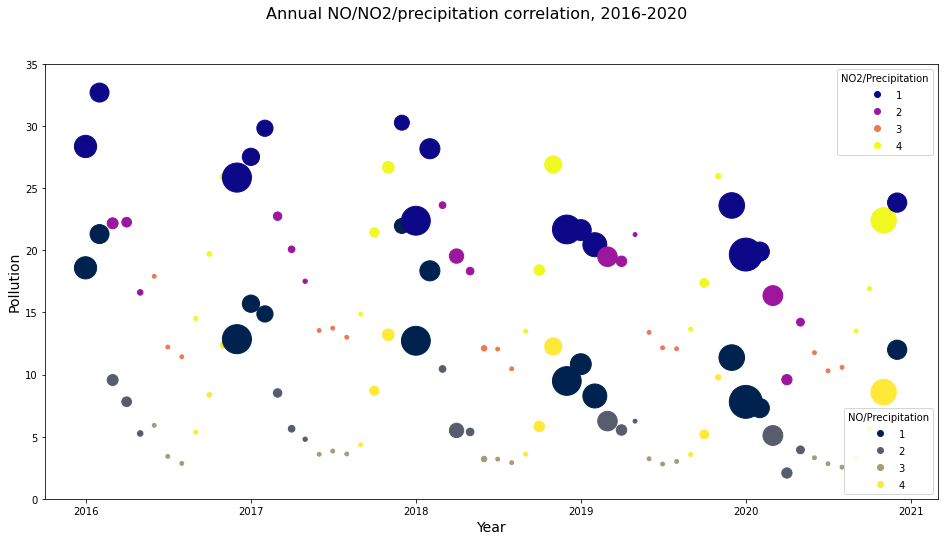

In [42]:
visualize_poll_prec_correlation_timeline(df, 35)

<h3>Cross Tabulation - Correlating columns</h3>
    
Correlation between air quality and rain days is very high when the air quality is good, and decreases dramatically when the air quality is low. The same happens when correlated with the rain volume.

In [43]:
rain_air_quality_crosstab = pd.crosstab(df['has_rained'], df['air_quality'], normalize='index')
rain_air_quality_crosstab

air_quality,1,2,3,4
has_rained,,,,
0,0.847879,0.102548,0.029320,0.020253
1,0.829381,0.120012,0.037016,0.013592


In [44]:
rainfall_air_quality_crosstab = pd.crosstab(df['rainfall_volume'], df['air_quality'], normalize='index')
rainfall_air_quality_crosstab

air_quality,1,2,3,4
rainfall_volume,,,,
1,0.847879,0.102548,0.029320,0.020253
2,0.837771,0.110454,0.035010,0.016765
3,0.810552,0.135492,0.043165,0.010791
4,0.827181,0.130872,0.035235,0.006711
